# Qiskit Cheat Sheet: The Deutsch-Jozsa Algorithm

In [1]:
# Quantum Circuits.
import qiskit

# Quantum simulator.
import qiskit_aer as aer




## Qubits and Registers

A quantum circuit is built from qubits in registers.

```python


In [2]:
# Two qubits, one classical bit.
qc = qiskit.QuantumCircuit(2, 1)

Qubits are indexed from left to right when created, but operations are written using indices starting from 0.

## Basic Gates

You only need a small number of gates.

In [3]:
# NOT gate (also known as X or Pauli X).
qc.x(1)

In [4]:
# Hadamard gate.
qc.h(0)

In [5]:
# Controlled-NOT (control, target).
qc.cx(0, 1)

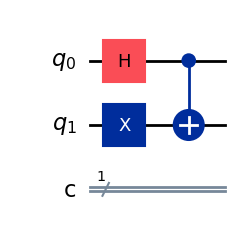

In [6]:
# Draw the circuit.
qc.draw(output='mpl')

The Hadamard gate creates superposition. Most mistakes in Deutsch-style algorithms come from missing or misplaced Hadamards.

## Measurement

Measurement collapses a qubit to a classical value.

In [7]:
# qc.measure(qubit_index, classical_bit_index)
qc.measure(0, 0)

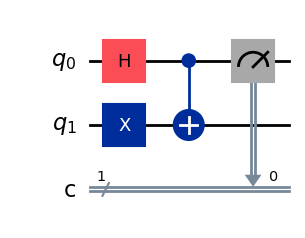

In [8]:
# Draw the circuit.
qc.draw(output='mpl')

In Deutsch’s algorithm, you typically measure only the input qubit, not the auxiliary qubit.


## Running a Circuit on a Simulator

Use Aer's simulator backend.

In [9]:
# Initialize the simulator.
backend = aer.Aer.get_backend("qasm_simulator")

# Compile our quantum circuit for the simulator.
compiled = qiskit.transpile(qc, backend)

In [10]:
# Run the circuit.
result = backend.run(compiled, shots=1024).result()

# Get the results.
counts = result.get_counts()

# Show results.
print(counts)

{'1': 495, '0': 529}


If your circuit is correct, Deutsch and Deutsch–Jozsa give deterministic results (up to simulator noise).


## What a Quantum Oracle Is

A quantum oracle implements the transformation

`|x⟩|y⟩ → |x⟩|y ⊕ f(x)⟩`

Key points:

* The oracle must be reversible.
* You do **not** overwrite `|x⟩`.
* The function value is XORed into the auxiliary qubit.

For one-bit inputs, most oracles can be built using `X` and `CX`.


## Building Oracles as Gates

It is often helpful to build the oracle as a separate circuit or gate.

In [11]:
# Create an circuit for an oracle.
oracle = qiskit.QuantumCircuit(2)

# Put barrier at the start.
oracle.barrier()

# Add gates to circuit.
oracle.cx(0, 1)

# Put barrier at the end.
oracle.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

You can then append it to another circuit.

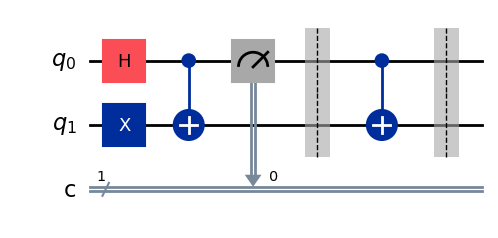

In [12]:
# Append the oracle to the original circuit.
qc.compose(oracle, inplace=True)

# Show.
qc.draw(output='mpl')

## Deutsch's Algorithm Pattern

### Circuit Design

1. Initialise input qubit to `|0⟩`.
2. Initialise auxiliary qubit to `|1⟩`.
3. Apply Hadamard to both qubits.
4. Apply the oracle.
5. Apply Hadamard to the input qubit.
6. Measure the input qubit.

### Results

- `0`: the function is constant.
- `1`: the function is balanced.


## Deutsch–Jozsa Pattern (n Inputs)

For `n` input qubits:

1. Start all input qubits in `|0⟩`.
2. Start one auxiliary qubit in `|1⟩`.
3. Apply Hadamard to all qubits.
4. Apply the oracle.
5. Apply Hadamard to all input qubits.
6. Measure the input register.

### Results

- All `0`: the function is constant.
- Else: the function is balanced.


## Common Mistakes

- Forgetting to set the auxiliary qubit to `|1⟩`.
- Measuring the wrong qubit(s).
- Building a non-reversible oracle.
- Applying Hadamard gates in the wrong order.
- Expecting probabilistic output where the algorithm is deterministic.
- If your result looks random, the circuit is wrong.
- If your oracle modifies the input qubits, it is wrong.
- If you are unsure, draw the circuit and step through it gate by gate.

## End